<h1>Imports</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h1>6.1</h1>

In [2]:
data = pd.read_csv("Student.csv",sep=',')
data.rename(columns={'Unnamed: 0':'gender'}, inplace=True)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<h1>6.2</h1>

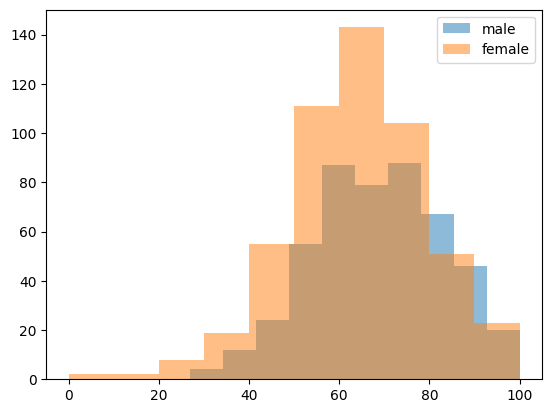

In [3]:
men = data[data.iloc[:,0]=="male"]
women = data[data.iloc[:,0]=="female"]
plt.hist(men.iloc[:,5], alpha=0.5, label="male")
plt.hist(women.iloc[:,5], alpha=0.5, label="female")
plt.legend(loc='upper right')


number of females and males are not same. so we should scale them in same range.

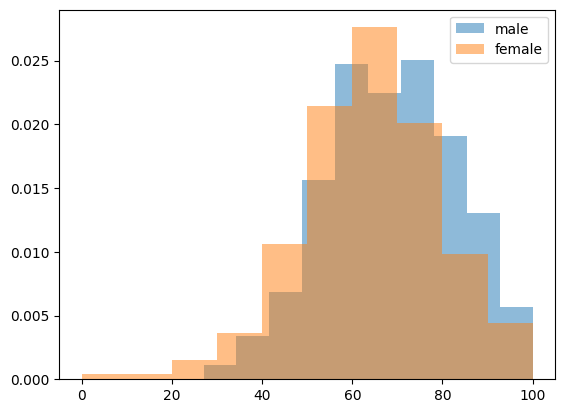

In [4]:
plt.hist(men.iloc[:,5],density=True ,alpha=0.5, label="male")
plt.hist(women.iloc[:,5],density=True, alpha=0.5, label="female")
plt.legend(loc='upper right')

In [5]:
men_describe = men.iloc[:,5].describe()
women_describe = women.iloc[:,5].describe()
print('\nFor men:\n')
print(men_describe)
print('\nFor women:\n')
print(women_describe)


For men:

count    482.000000
mean      68.728216
std       14.356277
min       27.000000
25%       59.000000
50%       69.000000
75%       79.000000
max      100.000000
Name: math score, dtype: float64

For women:

count    518.000000
mean      63.633205
std       15.491453
min        0.000000
25%       54.000000
50%       65.000000
75%       74.000000
max      100.000000
Name: math score, dtype: float64


In the first plot almost in every mark range females was better but in the second plot that is based on percentage we see that in good marks males have better percentage also males have better average and better performance in quantiles.

<h1>6.3</h1>

array([<Axes: ylabel='0'>], dtype=object)

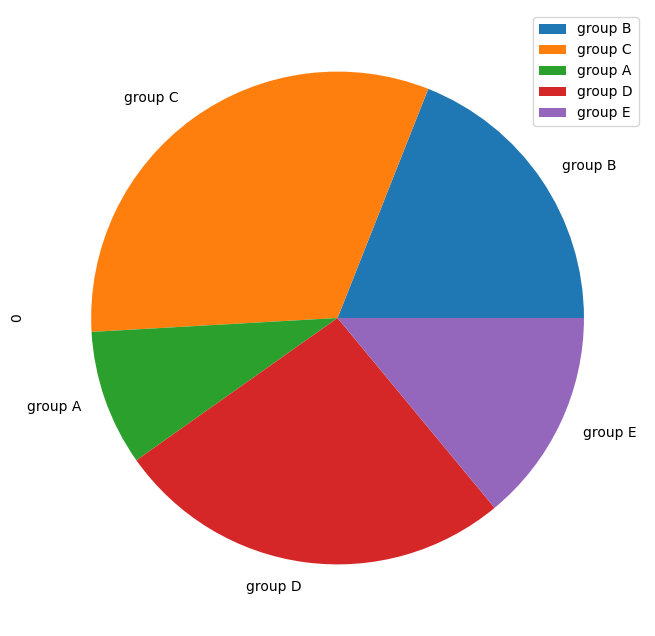

In [6]:
data_group_name = []
data_group_count = []

for i in range(len(data)):
    dt = data.iloc[i,1]
    if dt not in data_group_name:
        data_group_name.append(dt)
        data_group_count.append(1)
    else:
        index = data_group_name.index(dt)
        data_group_count[index] += 1

df = pd.DataFrame(data_group_count, index=data_group_name)
df.plot(kind='pie', subplots=True, figsize=(8, 8))

another way

array([<Axes: ylabel='race/ethnicity'>], dtype=object)

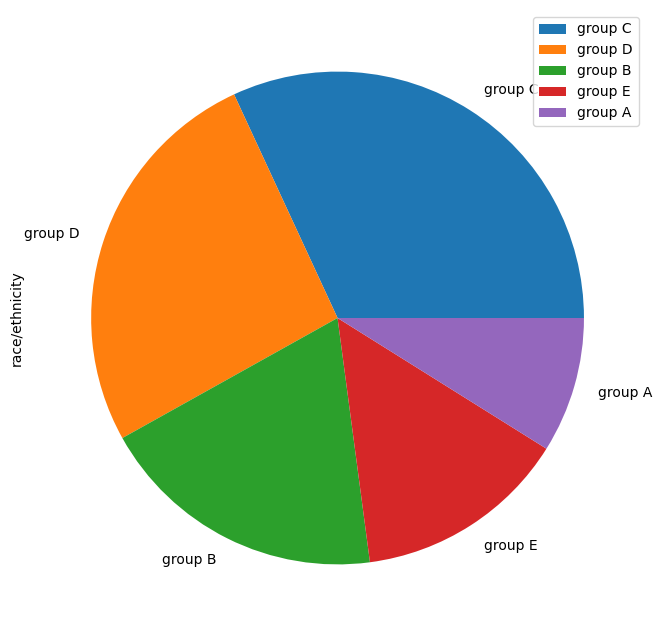

In [7]:
race_count = data["race/ethnicity"].value_counts()

df = pd.DataFrame(race_count)
df.plot(kind='pie', subplots=True, figsize=(8, 8))

<h1>6.4</h1>

In [8]:
total_grade = []
for index in range(len(data)):
    avg = (data.iloc[index,5]+data.iloc[index,6]+data.iloc[index,7])/3
    total_grade.append(avg)
data["total_grade"] = total_grade
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<h1>6.5</h1>

In [9]:
crosstab1 = crosstab = pd.crosstab(data.iloc[:,0], data.iloc[:,2],margins=True)
crosstab1

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,All
gender,,,,,,,
female,116,63,94,36,118,91,518
male,106,55,102,23,108,88,482
All,222,118,196,59,226,179,1000
